<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_Class/blob/main/AI_W9_31_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from keras.datasets import mnist #mnist la chu so viet tay

In [40]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images.shape


(60000, 28, 28)

In [41]:
test_images.shape

(10000, 28, 28)

In [42]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
x = test_images
y = test_labels

so may la: 6


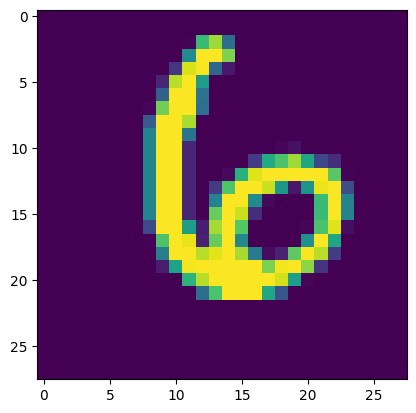

In [29]:
digit=train_images[1892]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('so may la:',train_labels[1892])

so may la: 5


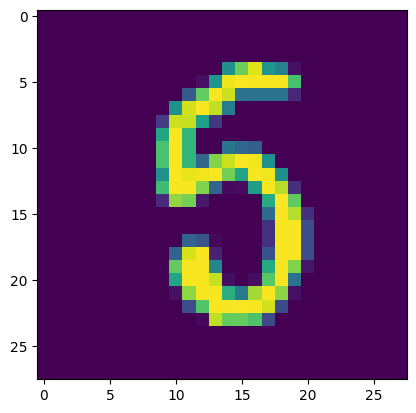

In [31]:
digit=train_images[14404]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('so may la:',train_labels[14404])

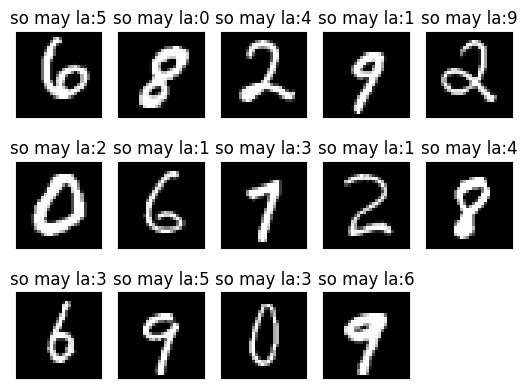

In [9]:
for i in range(14):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(train_images[i+1892],cmap='gray',interpolation='none')
   plt.title('so may la:{}'.format(train_labels[i]))
   plt.xticks([])
   plt.yticks([])

In [32]:
from keras.models import Sequential #Senquential  mo ta ANN theo tuan tu cac lop #ke tiep lien tuc nhau
from keras.layers import Dense      #Dense=full_connected( su ket noi daydu)  
model = Sequential()    
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
train_images = train_images.reshape((60000,28*28))  #chỉnh lại kích thước số dữ liệu đầu vào 
train_images = train_images.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

test_images = test_images.reshape((10000,28*28))  
test_images = test_images.astype('float32')/255

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [34]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [35]:
#data - model - cpmpile - train - evaluate

In [36]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(train_images,train_labels,epochs=10,batch_size=128)   #10 lần học, mỗi lần học 128 lần ngẫu nhiên
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2669 - accuracy: 0.9220
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1087 - accuracy: 0.9681
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0712 - accuracy: 0.9788
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0508 - accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0378 - accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0287 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0213 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0164 - accuracy: 0.9955
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0657 - accuracy: 0

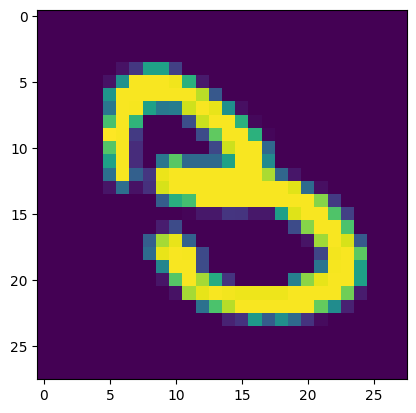

3


In [48]:
img = x[18]
plt.imshow(img)
plt.show()
print(y[18])

In [52]:
x_pred = x[10].reshape(1, 28*28)
x_pred = x_pred.astype("float32")/255 #Dua ve gia tri 0-1
x_pred.shape

(1, 784)

In [53]:
import numpy as np
np.argmax(model.predict(x_pred), axis = -1)

1/1 [==============================] - 0s 97ms/step


array([0])

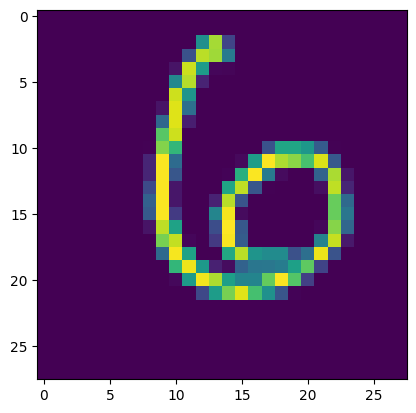

6
1/1 [==============================] - 0s 32ms/step


array([6])

In [54]:
img = x[100]
plt.imshow(img)
plt.show()
print(y[100])
x_pred = x[100].reshape(1, 28*28)
x_pred = x_pred.astype("float32")/255 #Dua ve gia tri 0-1
import numpy as np
np.argmax(model.predict(x_pred), axis = -1)